In [1]:


from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

import os


os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128

# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax'))  # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy',
                   metrics=['accuracy'])  # categorical_crossentropy for more than 2

# Step 2 - Preparing the train/test data and training the model
classifier.summary()

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(sz, sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical')
history = classifier.fit_generator(
    training_set,
    steps_per_epoch=540,  # No of images in training set
    epochs=50,
    validation_data=test_set,
    validation_steps=270)  # No of images in test set





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

C:\Users\PRASHI~1\AppData\Local\Temp/ipykernel_5084/619681287.py:68: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(


Epoch 1/50
540/540 [==============================] - 65s 117ms/step - loss: 3.2977 - accuracy: 0.0324 - val_loss: 3.2959 - val_accuracy: 0.0370
Epoch 2/50
540/540 [==============================] - 56s 103ms/step - loss: 3.2969 - accuracy: 0.0269 - val_loss: 3.2958 - val_accuracy: 0.0370
Epoch 3/50
540/540 [==============================] - 53s 98ms/step - loss: 3.2966 - accuracy: 0.0317 - val_loss: 3.2959 - val_accuracy: 0.0370
Epoch 4/50
540/540 [==============================] - 53s 98ms/step - loss: 3.2967 - accuracy: 0.0315 - val_loss: 3.2958 - val_accuracy: 0.0370
Epoch 5/50
540/540 [==============================] - 53s 98ms/step - loss: 3.2966 - accuracy: 0.0285 - val_loss: 3.2958 - val_accuracy: 0.0370
Epoch 6/50
540/540 [==============================] - 53s 98ms/step - loss: 3.2972 - accuracy: 0.0365 - val_loss: 3.2962 - val_accuracy: 0.0370
Epoch 7/50
540/540 [==============================] - 53s 98ms/step - loss: 3.2971 - accuracy: 0.0350 - val_loss: 3.2960 - val_accurac

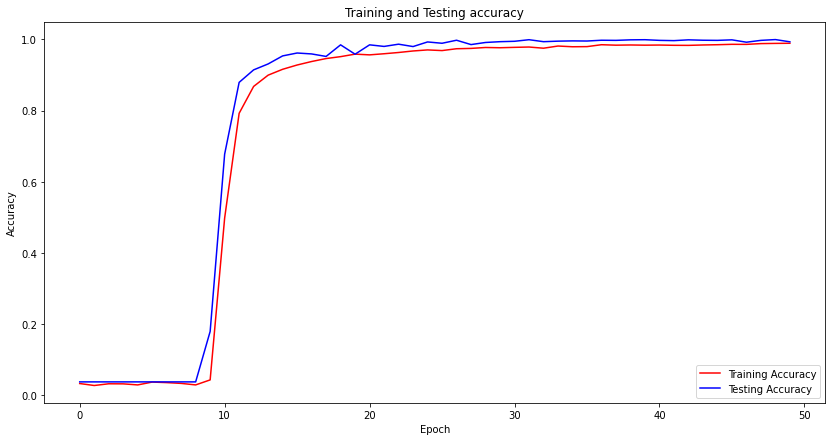

In [2]:
from matplotlib import pyplot as plt 

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Testing Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Graph for loss')

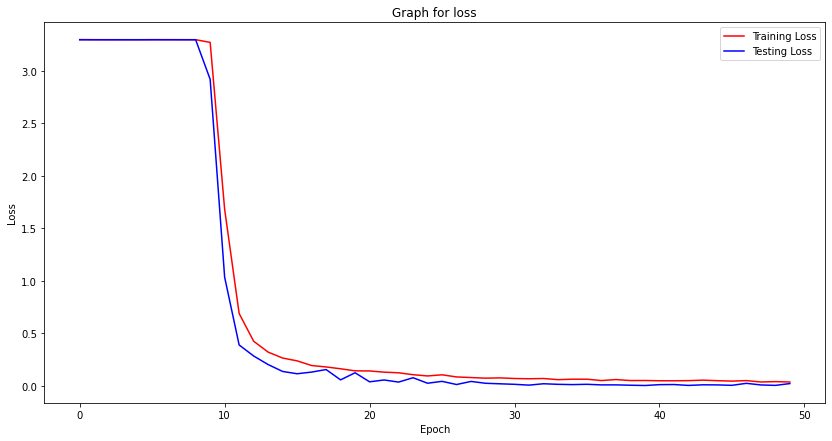

In [3]:
from matplotlib import pyplot as plt 

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Testing Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Graph for loss')

In [4]:
import numpy as np
from sklearn import metrics

predictions = classifier.predict(training_set, verbose=1)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=-1)
predictions = np.argmax(predictions, axis=-1) #multiple categories

true_classes = training_set.classes
class_labels = list(training_set.class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

540/540 [==============================] - 15s 28ms/step
              precision    recall  f1-score   support

           0       0.03      0.03      0.03       200
           A       0.04      0.04      0.04       200
           B       0.04      0.04      0.04       200
           C       0.05      0.05      0.05       200
           D       0.03      0.03      0.03       200
           E       0.02      0.02      0.02       200
           F       0.04      0.04      0.04       199
           G       0.04      0.04      0.04       200
           H       0.05      0.05      0.05       200
           I       0.02      0.01      0.02       200
           J       0.02      0.02      0.02       200
           K       0.05      0.04      0.05       200
           L       0.04      0.04      0.04       200
           M       0.04      0.04      0.04       200
           N       0.03      0.03      0.03       200
           O       0.05      0.05      0.05       199
           P       0.03 

In [5]:
# Saving the model
model_json = classifier.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('model-bw.h5')
print('Weights saved')

Model Saved
Weights saved
